# Machine Learning Model to figure out Absenteeism at Work

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score       #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#acquiring the train data
Ab_df=pd.read_excel("C:/Users/Subhajit Roy/Desktop/ab_data.xlsx")

In [6]:
#analysing the data
print(Ab_df.columns)

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


In [7]:
#previewing the data
Ab_df.sample(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
264,33,25,8,2,1,248,25,14,47,265615,...,0,1,2,0,0,1,86,165,32,2
588,3,27,2,4,2,179,51,18,38,264249,...,0,1,0,1,0,0,89,170,31,2
729,9,6,7,3,1,228,14,16,58,264604,...,0,1,2,0,0,1,65,172,22,120
205,14,28,5,5,3,155,12,14,34,378884,...,0,1,2,1,0,0,95,196,25,2
99,34,19,12,3,4,118,10,10,37,261306,...,0,1,0,0,0,0,83,172,28,64


In [8]:
#checking the structure of the dataset
Ab_df.shape

(740, 21)

In [75]:
#gathering statistical informations about dataset
Ab_df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
#gathering informations about dataset
Ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [13]:
#checking the differnt times of Absentees in hours
Ab_df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

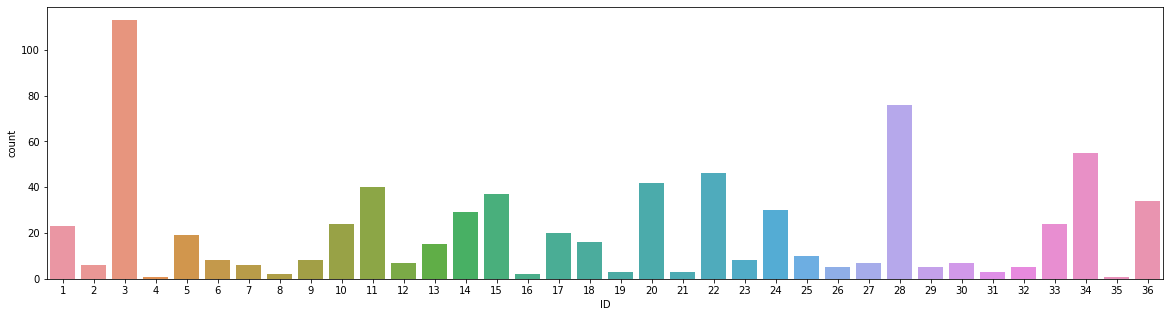

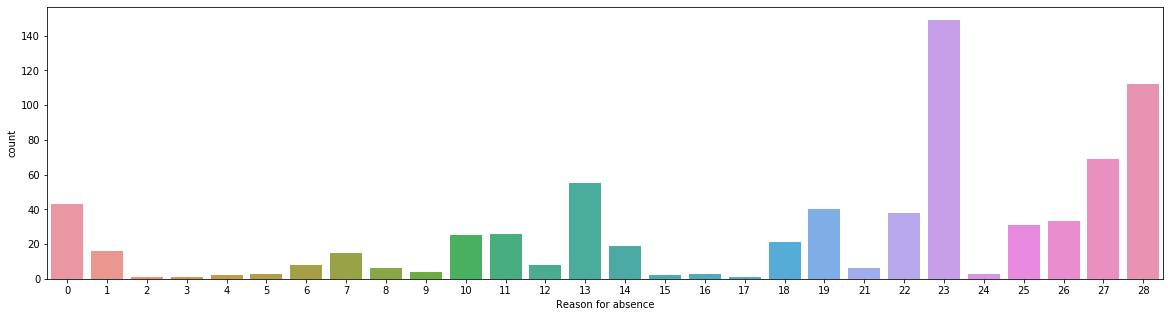

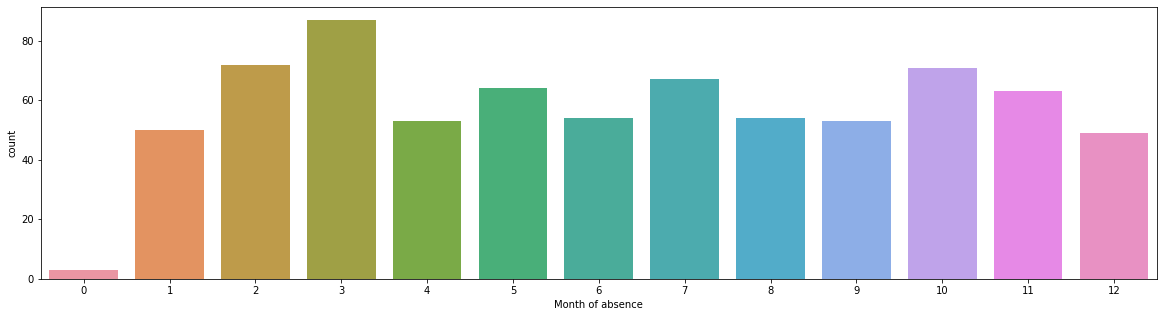

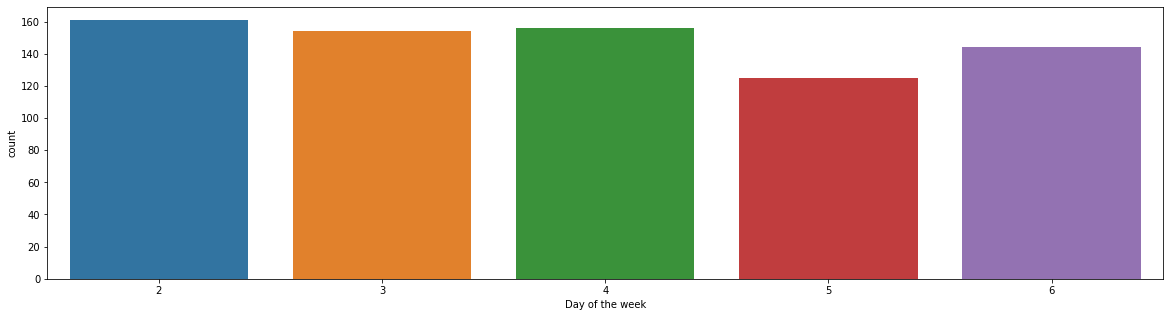

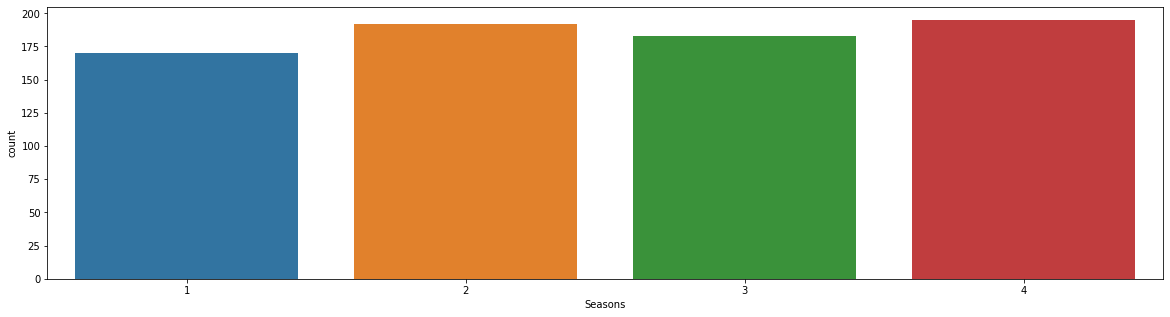

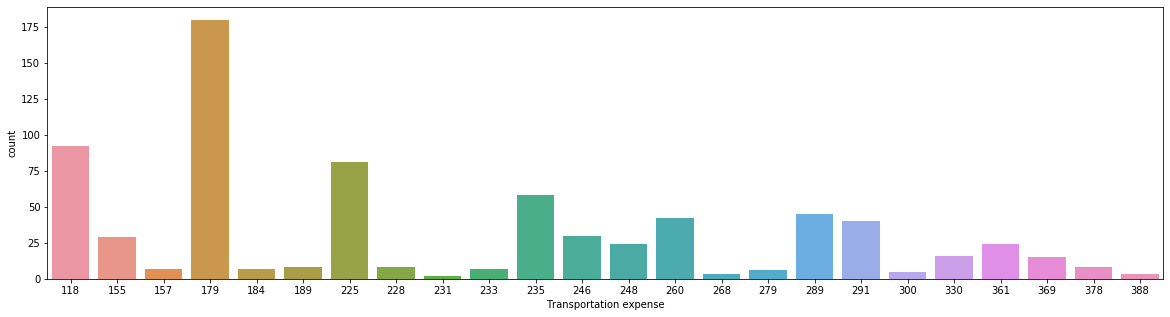

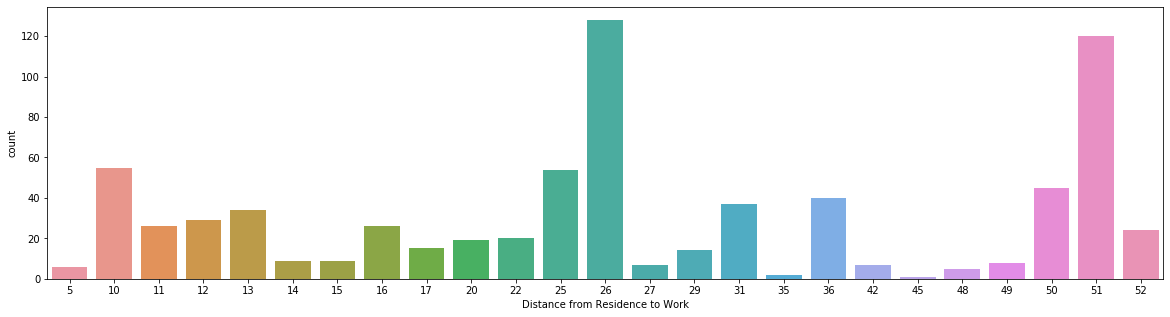

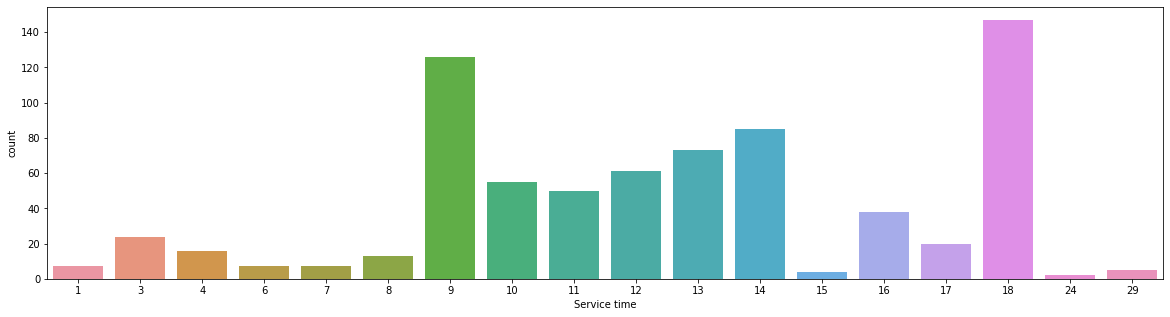

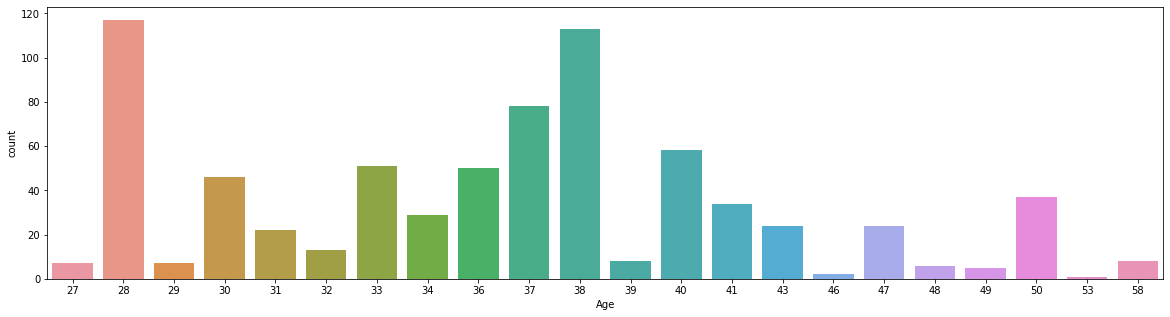

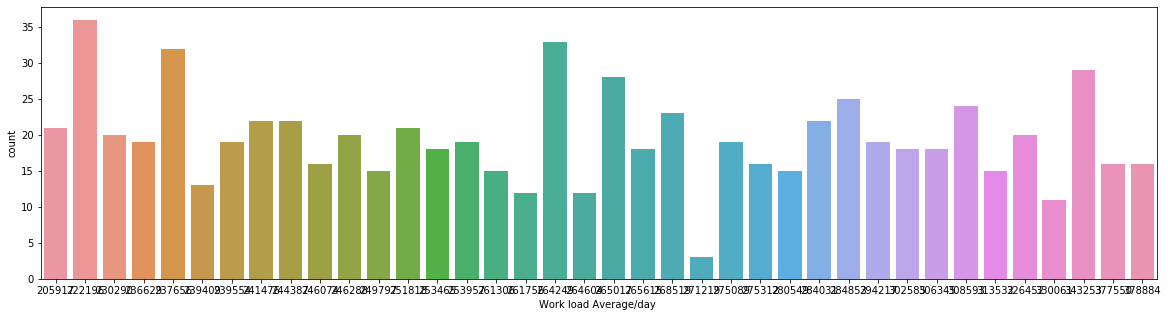

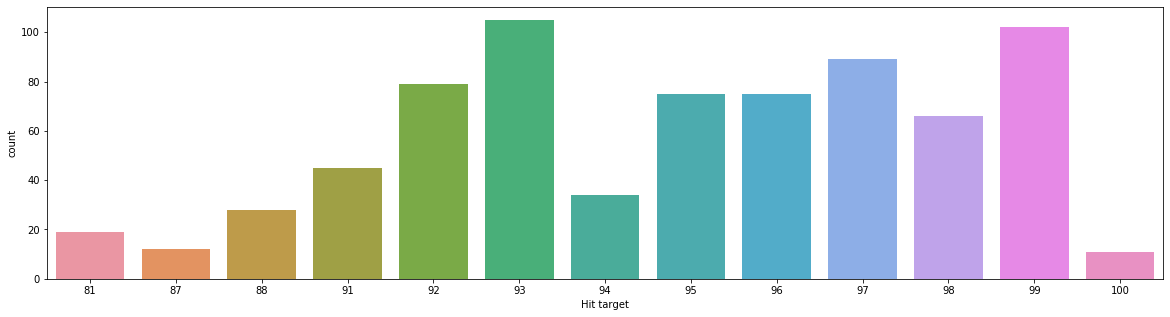

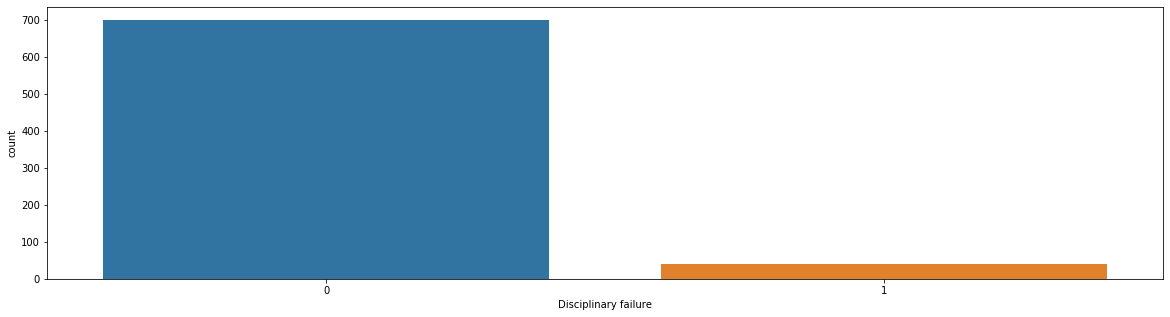

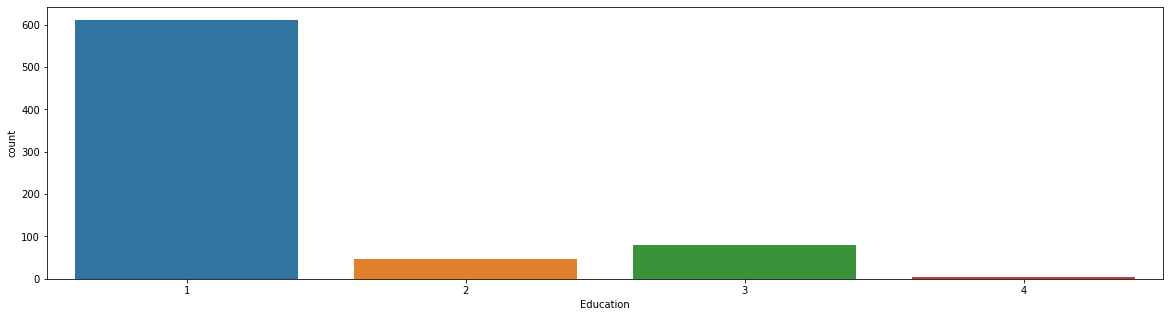

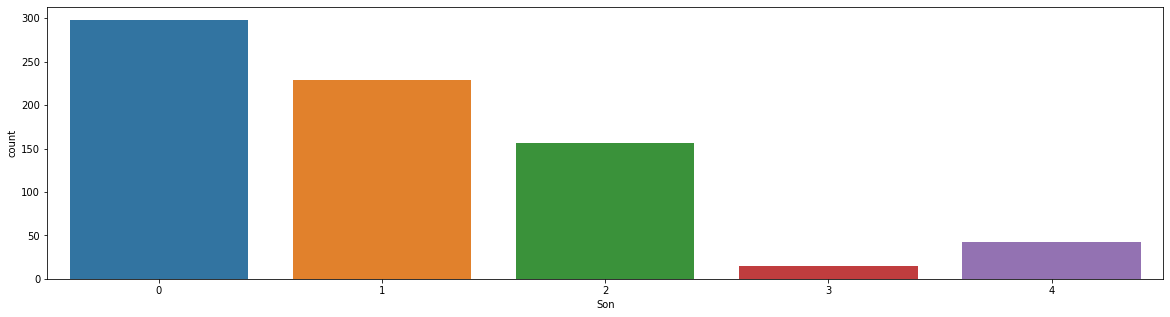

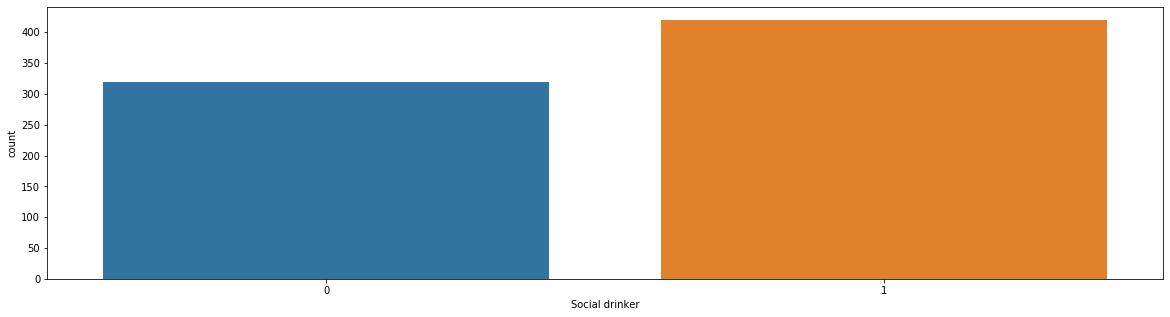

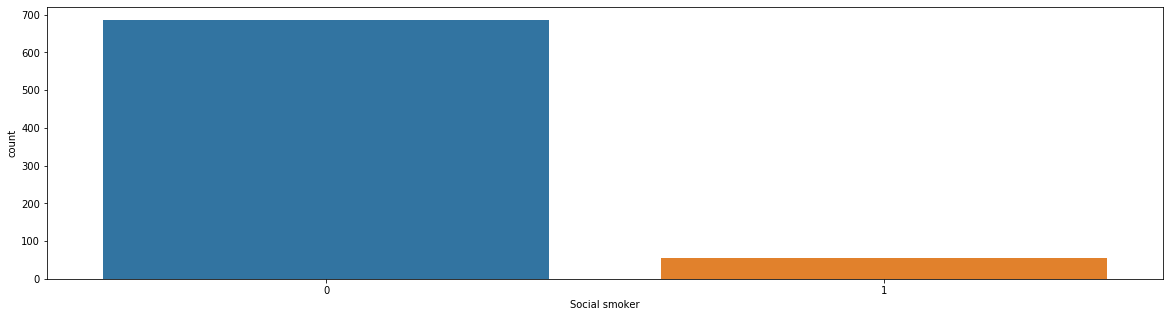

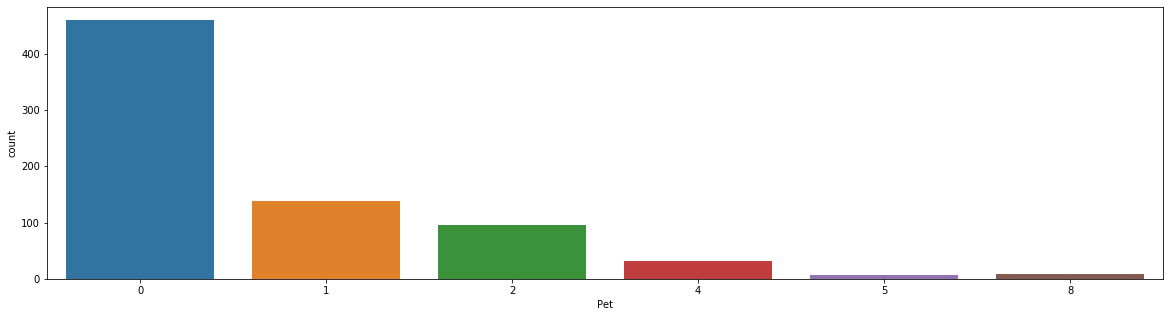

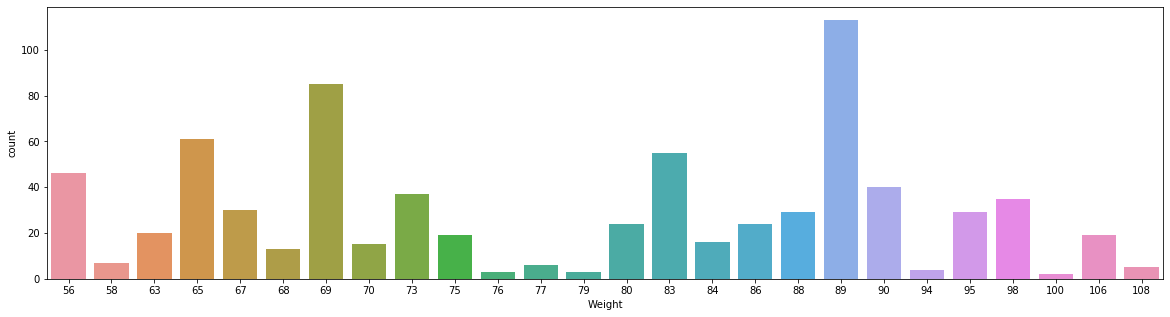

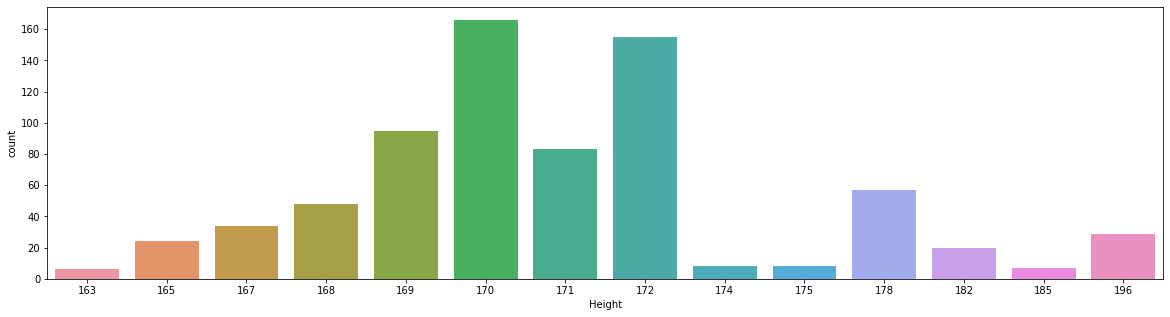

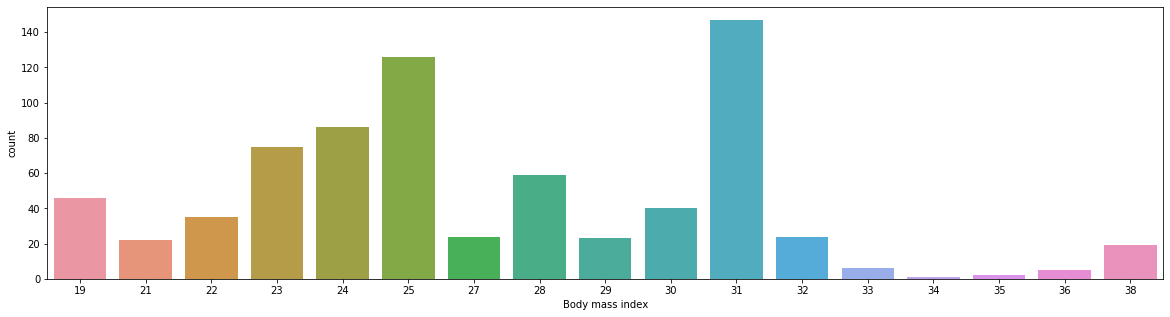

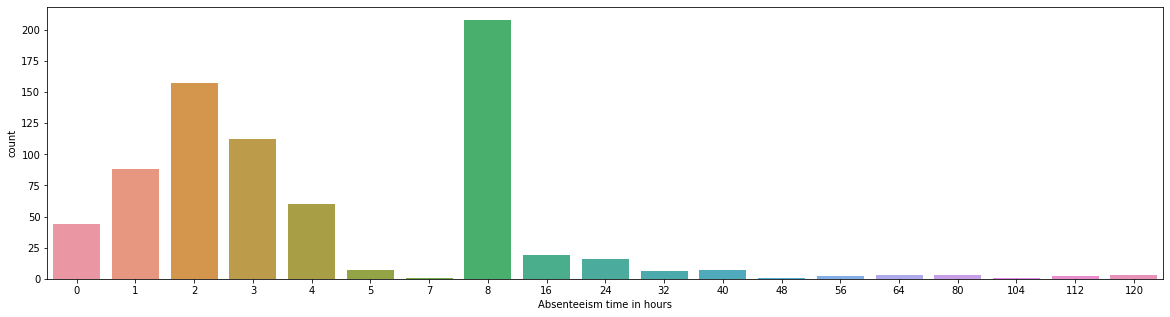

In [23]:
#printing different countplot
data_columns=Ab_df.columns
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(20,5))
    sns.countplot(data=Ab_df,x=data_columns[i])

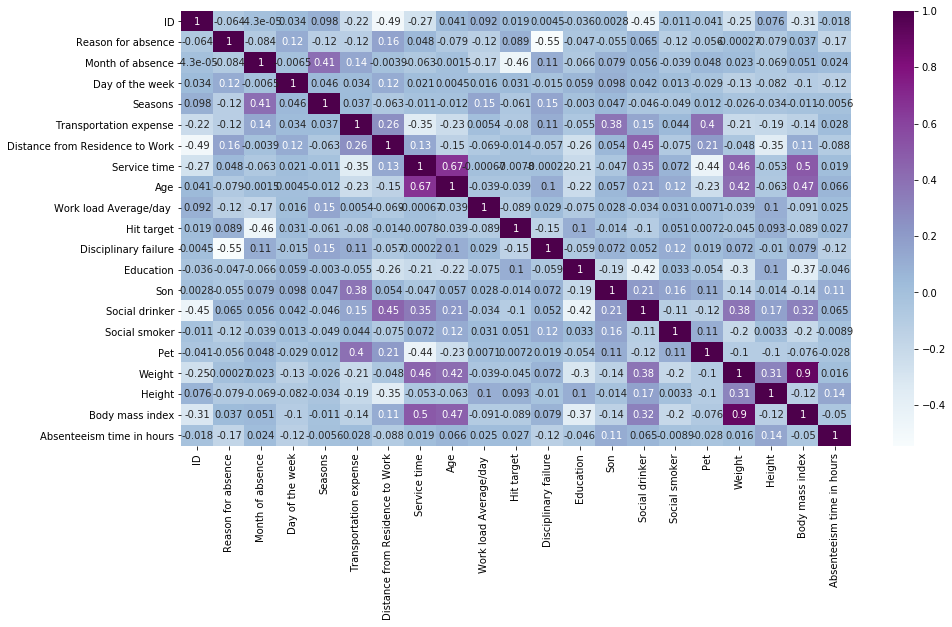

In [81]:
#checking for the correlation
corr_hmap=Ab_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_hmap,cmap='BuPu',annot=True)

ID                                    AxesSubplot(0.125,0.772143;0.168478x0.107857)
Reason for absence                 AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Month of absence                   AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Day of the week                    AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Seasons                               AxesSubplot(0.125,0.642714;0.168478x0.107857)
Transportation expense             AxesSubplot(0.327174,0.642714;0.168478x0.107857)
Distance from Residence to Work    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Service time                       AxesSubplot(0.731522,0.642714;0.168478x0.107857)
Age                                   AxesSubplot(0.125,0.513286;0.168478x0.107857)
Work load Average/day              AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Hit target                         AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Disciplinary failure               AxesSubplot(0.731522,0.513286;0.168478x0.

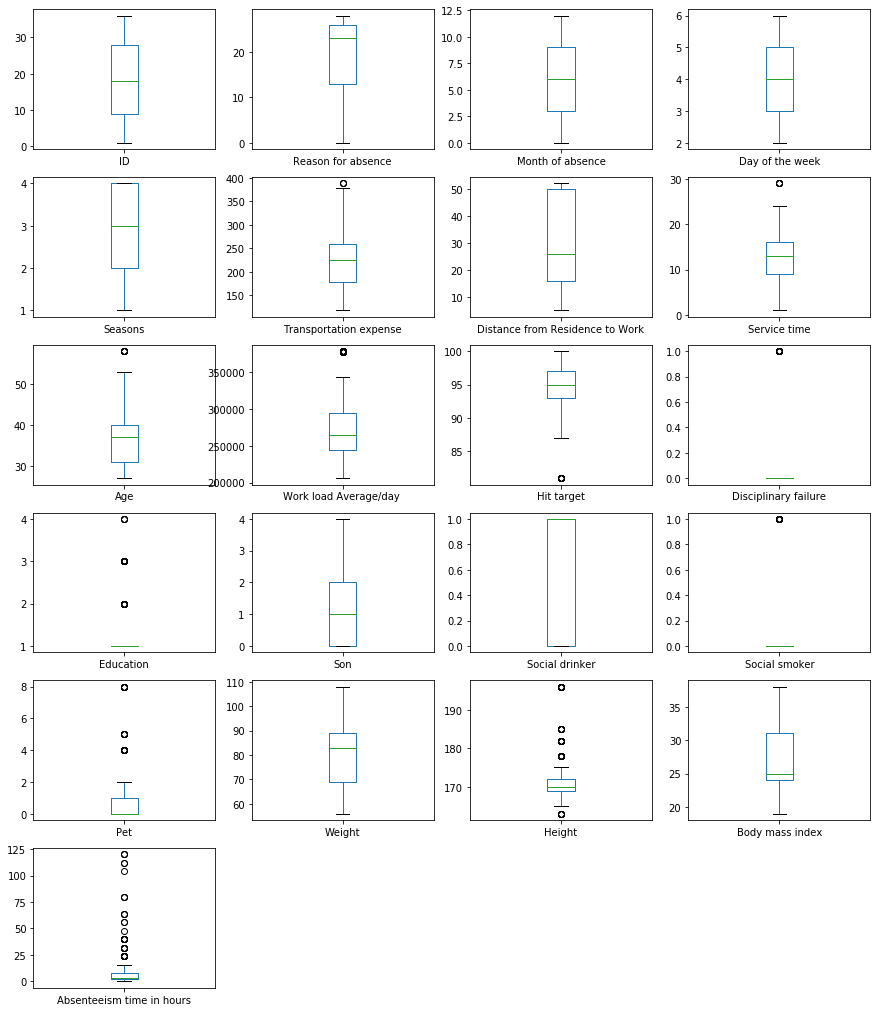

In [31]:
#checking for the outliers
Ab_df.plot(kind='box',subplots=True,layout=(6,4),figsize=(15,18))

In [33]:
#removing outliers
z_score=np.abs(zscore(Ab_df))
print(Ab_df.shape)
Ab_df_final=Ab_df.loc[(z_score<3).all(axis=1)]
print(Ab_df_final.shape)

(740, 21)
(576, 21)


In [34]:
#checking the skewness after removing the outliers
Ab_df.skew()

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

In [35]:
#Now separating input and output variable
x=Ab_df.drop(['Absenteeism time in hours'],axis=1)
y=Ab_df['Absenteeism time in hours']
print(x.shape)
print(y.shape)

(740, 20)
(740,)


In [36]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.63716146,  0.80493838,  0.19676258, ...,  0.85167289,
        -0.01904601,  0.77593223],
       [ 1.63271857, -2.28012426,  0.19676258, ...,  1.47305611,
         0.97582783,  1.00943766],
       [-1.36352307,  0.44896961,  0.19676258, ...,  0.77399998,
        -0.35067062,  1.00943766],
       ...,
       [-1.27272787, -2.28012426, -1.84169773, ...,  1.47305611,
        -0.35067062,  1.70995395],
       [-0.90954706, -2.28012426, -1.84169773, ...,  1.62840192,
        -0.35067062,  1.94345938],
       [ 1.54192337, -2.28012426, -1.84169773, ..., -0.15807485,
         0.47839091, -0.39159492]])

In [65]:
#Machine Learning Models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [66]:
accuracy_results = []
names = []
for name, model in models:
    print(name)
    max_acc_score=0
    for r_state in range(42,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        accuracy_scr=accuracy_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",accuracy_scr)
        if accuracy_scr>max_acc_score:
            max_acc_score=accuracy_scr      
            final_r_state=r_state
    accuracy_results.append(max_acc_score*100)        
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_acc_score)
    print()
    print()

LR
random state:  42  accuracy score:  0.5
random state:  43  accuracy score:  0.47297297297297297
random state:  44  accuracy score:  0.4189189189189189
random state:  45  accuracy score:  0.4189189189189189
random state:  46  accuracy score:  0.5
random state:  47  accuracy score:  0.5
random state:  48  accuracy score:  0.527027027027027
random state:  49  accuracy score:  0.47297297297297297
random state:  50  accuracy score:  0.43243243243243246
random state:  51  accuracy score:  0.5
random state:  52  accuracy score:  0.4189189189189189
random state:  53  accuracy score:  0.40540540540540543
random state:  54  accuracy score:  0.43243243243243246
random state:  55  accuracy score:  0.4864864864864865
random state:  56  accuracy score:  0.4594594594594595
random state:  57  accuracy score:  0.4864864864864865
random state:  58  accuracy score:  0.3783783783783784
random state:  59  accuracy score:  0.43243243243243246
random state:  60  accuracy score:  0.4189189189189189
random 

random state:  42  accuracy score:  0.5135135135135135
random state:  43  accuracy score:  0.5
random state:  44  accuracy score:  0.40540540540540543
random state:  45  accuracy score:  0.43243243243243246
random state:  46  accuracy score:  0.4864864864864865
random state:  47  accuracy score:  0.5
random state:  48  accuracy score:  0.5405405405405406
random state:  49  accuracy score:  0.3783783783783784
random state:  50  accuracy score:  0.581081081081081
random state:  51  accuracy score:  0.527027027027027
random state:  52  accuracy score:  0.44594594594594594
random state:  53  accuracy score:  0.4189189189189189
random state:  54  accuracy score:  0.3918918918918919
random state:  55  accuracy score:  0.4594594594594595
random state:  56  accuracy score:  0.4594594594594595
random state:  57  accuracy score:  0.5
random state:  58  accuracy score:  0.3918918918918919
random state:  59  accuracy score:  0.4594594594594595
random state:  60  accuracy score:  0.5
random state: 

In [57]:
#cross_val of the models
results = []
names = []
cvs=[]
for name, model in models:
    cv_result=cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    results.append(cv_result)
    names.append(name)
    print("Model name: ",name)
    print("Cross Validation Score(Mean): ",cv_result.mean())
    cvs.append(cv_result.mean()*100)
    print("Cross Validation Score(Std): ",cv_result.std())
    print()

Model name:  LR
Cross Validation Score(Mean):  0.4664007976071785
Cross Validation Score(Std):  0.05009036211517568

Model name:  KNN
Cross Validation Score(Mean):  0.39884631818829225
Cross Validation Score(Std):  0.04794717761262191

Model name:  DT
Cross Validation Score(Mean):  0.4257228315054835
Cross Validation Score(Std):  0.022004329103377986

Model name:  GNB
Cross Validation Score(Mean):  0.11652186298248113
Cross Validation Score(Std):  0.02263789784340939

Model name:  SVC
Cross Validation Score(Mean):  0.4799173906850876
Cross Validation Score(Std):  0.04636064376462736



In [40]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(x, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [41]:
print(selection.feature_importances_)

[0.02388384 0.19716432 0.10448515 0.15011926 0.065017   0.02666763
 0.01783255 0.01793343 0.0186197  0.11327661 0.10548603 0.05135949
 0.0075715  0.0210126  0.01068005 0.00534251 0.01191126 0.01780515
 0.0166495  0.01718243]


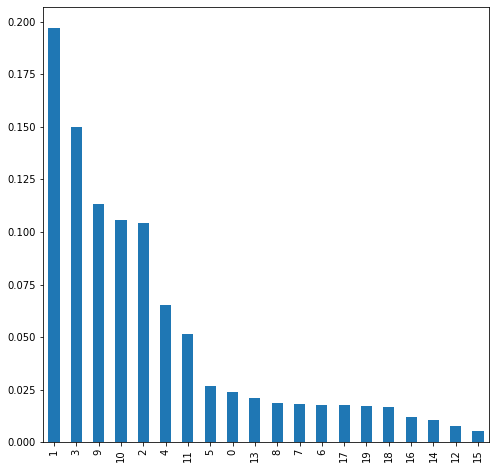

In [44]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (8,8))
feat_importances = pd.Series(selection.feature_importances_)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

In [94]:
from sklearn.ensemble import RandomForestClassifier
for r_state in range(42,80):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
    rf_clf=RandomForestClassifier()
    rf_clf.fit(x_train,y_train)
    y_pred=rf_clf.predict(x_test)
    accuracy_scr=accuracy_score(y_test,y_pred)
    print("random state: ",r_state," accuracy score: ",accuracy_scr)
    if accuracy_scr>max_acc_score:
        max_acc_score=accuracy_scr      
        final_r_state=r_state
accuracy_results.append(max_acc_score*100)        
print()
print("max accuracy score at random state:",final_r_state," for the model ",rf_clf," is: ",max_acc_score)
print()
print()

random state:  42  accuracy score:  0.44594594594594594
random state:  43  accuracy score:  0.5
random state:  44  accuracy score:  0.43243243243243246
random state:  45  accuracy score:  0.4189189189189189
random state:  46  accuracy score:  0.4864864864864865
random state:  47  accuracy score:  0.44594594594594594
random state:  48  accuracy score:  0.5945945945945946
random state:  49  accuracy score:  0.44594594594594594
random state:  50  accuracy score:  0.4864864864864865
random state:  51  accuracy score:  0.581081081081081
random state:  52  accuracy score:  0.4189189189189189
random state:  53  accuracy score:  0.44594594594594594
random state:  54  accuracy score:  0.43243243243243246
random state:  55  accuracy score:  0.5135135135135135
random state:  56  accuracy score:  0.4189189189189189
random state:  57  accuracy score:  0.5135135135135135
random state:  58  accuracy score:  0.40540540540540543
random state:  59  accuracy score:  0.5540540540540541
random state:  60  

In [95]:
y_pred = rf_clf.predict(x_test)
rf_clf.score(x_train, y_train)

0.960960960960961

In [96]:
rf_clf.score(x_test, y_test)

0.527027027027027

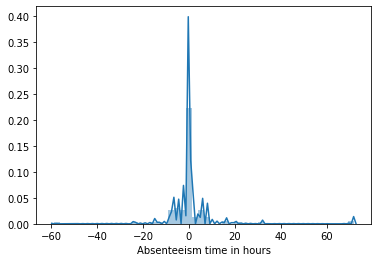

In [51]:
sns.distplot(y_test-y_pred)
plt.show()

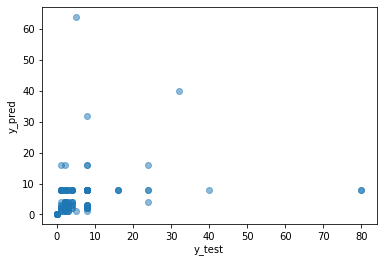

In [52]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.168918918918919
MSE: 123.66891891891892
RMSE: 11.120652809926174


In [97]:
#saving the model as pickle in a file
pickle.dump(rf_clf,open('RC_absenteesim_data.pkl','wb'))

In [98]:
#loading the model for testing
loaded_model=pickle.load(open('RC_absenteesim_data.pkl','rb'))
loaded_model.predict(x_test)

array([ 1,  3,  0,  8,  3,  1,  2,  4, 16,  2,  8,  8,  2,  2,  8,  4,  8,
        8,  3,  2,  1,  0,  8,  8,  1,  7,  3,  8,  8,  2,  2,  3,  8,  2,
        8,  2, 32,  8,  1,  2,  3,  8,  8,  4,  8,  1,  2,  2,  3, 80,  8,
        4,  8,  1,  1,  4,  2,  2,  2,  8, 24,  2,  3,  8,  4,  2,  2,  0,
        1,  8,  0,  1,  8,  2], dtype=int64)